### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [62]:
# try:
#   from google.colab import drive
#   drive.mount('/content/drive')
# except:
#   pass

In [63]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df_test = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df_test:
  for i, value in df_test[col].items():
    df_test.at[i, col] = f'{i}/{col}'

df_test

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [64]:
# Question 1:
# Import the spacy package (and install if if needed)
# Load the "en_core_web_sm" model into a variable
# Load the following text into that model: "I am a master builder of text analytics!"
# Print each token and the lemmatized version one-at-a-time using a loop

import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm") 
doc = nlp("I am a master builder of text analytics!")

for token in doc:
    print(token, token.lemma_, token.pos_, token.dep_)

I I PRON nsubj
am be AUX ROOT
a a DET det
master master NOUN compound
builder builder NOUN attr
of of ADP prep
text text NOUN compound
analytics analytic NOUN pobj
! ! PUNCT punct


In [65]:
# Question 2:
# Conceptual question; no code required here.

In [66]:
# Question 3:
# Create a function that takes a string as input and builds a DataFrame based on the
# properties returned by the spacy model. The DataFrame should have the following columns:
# Index: Token, Columns: Lemma, POS, Tag, Dep, Shape, isAlpha, isStop
# Call the function using the same string as in Question 1 and print the resulting DataFrame.

import pandas as pd
import spacy

def string_dataframe(text):
    # Load SpaCy English model
    nlp = spacy.load("en_core_web_sm")
    
    # Process the input text
    doc = nlp(text)
    
    # Initialize lists to store token properties
    tokens = []
    lemmas = []
    pos_tags = []
    tags = []
    dependencies = []
    shapes = []
    is_alpha_list = []
    is_stop_list = []
    
    # Iterate through tokens in the document
    for token in doc:
        tokens.append(token.text)
        lemmas.append(token.lemma_)
        pos_tags.append(token.pos_)
        tags.append(token.tag_)
        dependencies.append(token.dep_)
        shapes.append(token.shape_)
        is_alpha_list.append(token.is_alpha)
        is_stop_list.append(token.is_stop)
    
    # Create a DataFrame from the lists
    df = pd.DataFrame({
        'Token': tokens,
        'Lemma': lemmas,
        'POS': pos_tags,
        'Tag': tags,
        'Dep': dependencies,
        'Shape': shapes,
        'isAlpha': is_alpha_list,
        'isStop': is_stop_list
    })

    # Set the 'Token' column as the index
    df.set_index('Token', inplace=True)
    
    return df

# Sample text from Question 1
text = "I am a master builder of text analytics!"

# Call the function and print the resulting DataFrame
string_df = string_dataframe(text)
string_df.head(50)


,Lemma,POS,Tag,Dep,Shape,isAlpha,isStop
Token,,,,,,,
I,I,PRON,PRP,nsubj,X,True,True
am,be,AUX,VBP,ROOT,xx,True,True
a,a,DET,DT,det,x,True,True
master,master,NOUN,NN,compound,xxxx,True,False
builder,builder,NOUN,NN,attr,xxxx,True,False
of,of,ADP,IN,prep,xx,True,True
text,text,NOUN,NN,compound,xxxx,True,False
analytics,analytic,NOUN,NNS,pobj,xxxx,True,False
!,!,PUNCT,.,punct,!,False,False


In [67]:
# Question 4:
# Conceptual question; no code required here.

In [68]:
# Question 5:
# Create a function that takes a string as input and returns only the lemmatized
# tokens that are not stop words. Also, create a parameter for the function that
# allows the user to specify which parts of speech should be kept. Return the string
# as a list of words.

# Call the function using the same string as in the first question. Only allow nouns,
# verbs, adjectives, and adverbs to be returned. Print the resulting list without modifications.


import spacy

def lemmatized_stop(text, allowed_pos=['NOUN', 'VERB', 'ADJ', 'ADV']):
    nlp = spacy.load("en_core_web_sm")
    
    # Process the input text
    doc = nlp(text)
    
    # Initialize a list to store lemmatized tokens without stop words
    lemmatized_tokens = []
    
    # Iterate through tokens in the document
    for token in doc:
        # Check if the token is not a stop word and its part-of-speech tag is allowed
        if not token.is_stop and token.pos_ in allowed_pos:
            lemmatized_tokens.append(token.lemma_)
    
    return lemmatized_tokens

# Sample text from Question 1
text = "I am a master builder of text analytics!"

# Call the function with allowed parts of speech and print the resulting list
result_list = lemmatized_stop(text)
print(result_list)


['master', 'builder', 'text', 'analytic']


In [69]:
# Question 6:
# Conceptual question; no code required here.

In [70]:
# Question 7: Import the dataset that came with this assignment into a Pandas DataFrame.
# Print the shape and the first five rows of the DataFrame.

df_topics = pd.read_csv('../Data/tw_tweets_users_media_places.csv')
print(df_topics.shape)
df_topics.head()

(534, 34)


,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
0,1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,...,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1,1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,...,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
2,1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,...,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
3,1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
4,1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,...,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [71]:
# Question 8:
# Using either the functions provided in the book chapter or some that you create yourself,
# add the following columns to this DataFrame:

# - Number of words or tokens in the post
# - Number of Nouns in the post
# - Number of Verbs in the post
# - Number of Adjectives in the post
# - Number of Adverbs in the post
# - Number of Persons referenced in the post
# - Number of Organizations referenced in the post
# - Number of Locations (GPE) referenced in the post
# - Number of Products referenced in the post
# - Number of Events referenced in the post

# These counts should all be based on the determinations made by the spacy model. Print the
# first 5 records in the DataFrame with these new columns. Also print the sum of each of these
# new columns.

# How many total events are referenced in the dataset based on the spacy model?

def clean_text(tokenized_doc):
    collection = [] # Create a list of fragments to keep
    for token in tokenized_doc:
        if not token.is_stop and token.pos_ != 'PUNCT':
            collection.append(token.lemma_) # Add the lemmatized version of the word
    return tuple(collection)

      # Make a function to count up a given part of speech
def count_pos(tokenized_doc, pos):
    count = 0
    for token in tokenized_doc:
        if token.pos_ == pos:
            count += 1
    return count

def count_entities(tokenized_doc, ne):
    count = 0
    for token in tokenized_doc.ents:
        if token.label_ == ne:
            count += 1
    return count

nlp = spacy.load("en_core_web_sm")
df_topics['Tokenized'] = df_topics['text'].apply(lambda x: clean_text(nlp(x)))
df_topics['Nouns'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'NOUN'))
df_topics['Verbs'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'VERB'))
df_topics['Adjectives'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'ADJ'))
df_topics['Numbers'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'NUM'))
df_topics['Pronouns'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'PRON'))
df_topics['People'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'PERSON'))
df_topics['Organizations'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'ORG'))
df_topics['Locations'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'GPE'))
df_topics['Products'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'PRODUCT'))
df_topics['Events'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'EVENT'))
df_topics['Dates'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'DATE'))
df_topics['Times'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'TIME'))

df_topics.head()
print(df_topics[['Tokenized', 'Nouns', 'Verbs', 'Adjectives', 'Numbers', 'Pronouns', 'People', 'Organizations', 'Locations', 'Products', 'Events', 'Dates', 'Times']].sum())

Tokenized        (grandson, morning, w, /, autism, apparently, ...
Nouns                                                         5384
Verbs                                                         2511
Adjectives                                                    1477
Numbers                                                        393
Pronouns                                                      1727
People                                                         388
Organizations                                                  343
Locations                                                      130
Products                                                        21
Events                                                          11
Dates                                                          242
Times                                                           44
dtype: object


In [72]:
print(df_topics[['Tokenized', 'Nouns', 'Verbs', 'Adjectives', 'Numbers', 'Pronouns', 'People', 'Organizations', 'Locations', 'Products', 'Events', 'Dates', 'Times']].sum())


Tokenized        (grandson, morning, w, /, autism, apparently, ...
Nouns                                                         5384
Verbs                                                         2511
Adjectives                                                    1477
Numbers                                                        393
Pronouns                                                      1727
People                                                         388
Organizations                                                  343
Locations                                                      130
Products                                                        21
Events                                                          11
Dates                                                          242
Times                                                           44
dtype: object


In [73]:
# Question 9:
# Next, we are going to build a topic model for this dataset. 
# As usual, follow the instructions in the order they are given to be successful. 
# The process flows like a pipeline, unless specified otherwise, you will use the data generated in 
# each step for the step that follows in a linear fashion--just like it flows in the chapter. 
# You are welcome to use any of the functions you find in the chapter. 
# But, although it is good practice to create a pipeline with functions, using functions is not required for the rest of this assignment.

# First, create a dataset of the post 'text' column that has all email addresses, new line breaks, single quotes, and urls removed. 
# You can store this cleaned dataset however you'd like: in a list, a Pandas Series, 
# as a new column in the original DataFrame, or something else. We are following the process that we went through in the chapter. 
# If you're not sure what I'm talking about, then you probably need to take a look at the chapter.

# Print out the first five documents in the dataset after being cleaned as described above. 
# Remember, this is the list of text documents (posts). Not the entire DataFrame.

def re_mod(doc):
  import re
  doc = re.sub('\\S*@\\S*\\s?', '', doc)  # remove emails
  doc = re.sub('\\s+', ' ', doc)          # remove newline chars
  doc = re.sub("\\'", "", doc)            # remove single quotes
  doc = re.sub(r"http\S+", "", doc)    # replace URLs with 'url'
  return doc

# Convert each tweet to a list of cleaned words and add to a master list
docs = df_topics['text'].apply(lambda x: re_mod(x)).values.tolist()

# Print the first five records to see what they look like
for doc in docs[:5]:
  print(doc)

This was my grandson this morning (w/autism)! Apparently he is going through a bout of bronchitis &amp; pneumonia he always gets it every year! My daughter said that she is sure she will have to take him to the hospital tonight but if they try to test him for covid she will walk out 
Wow!! Been into #York for the first time since Christmas shopping in Dec 2019. Took our daughter Cerys to the #CatCafe to celebrate her 10th birthday. Perfectly relaxed, quiet, covid unfriendly AND #Autism friendly. She was in her happy place. 😍🐈‍⬛ 
Sad number of ppl who lost life due to covid-19 is far more than the number that it says on the news. Those who pass away in care homes, supported living or in the community are not counted. Give a thought of autistic people &amp; with learning disabilities- every life matters❤️ 
Webinar now available‘Staying healthy at home during the coronavirus crisis’ deliver by Matthew Roberts and Steve Hardy #LearningDisability #autism #socialcare  
Webinar now available‘

In [74]:
# Question 10:
# Next, we are going to tokenize the documents. 
# At the same time, we will remove stop words and punctuation. 
# We will also return the lemmatized version of each token--just like we did in the chapter. 
# Perform that step on the dataset you created in the previous question. 
# Print out the first five documents in the dataset after being tokenized.

import spacy
nlp = spacy.load('en_core_web_sm')
stop_words_spacy = nlp.Defaults.stop_words
# stop_words_spacy |= {}

def docs_lemma_stop(doc, stop_words):
  unigrams = []
  for unigram in doc: # remove stop words and punctuation
    if not unigram.text in stop_words:      # Check both versions of the word
      if not unigram.lemma_ in stop_words:  # Check both versions of the word
        if not unigram.is_punct:            # Remove punctuation
          unigrams.append(unigram.lemma_)   # append the lemmatized version
  return unigrams

# Call the function to remove stop words, punctuation and perform lemmatization on each doc
docs = [docs_lemma_stop(nlp(doc), stop_words_spacy) for doc in docs]

# Print the first five records to see what they look like
for doc in docs[:5]:
  print(doc)

['grandson', 'morning', 'w', 'autism', 'apparently', 'bout', 'bronchitis', 'amp', 'pneumonia', 'year', 'daughter', 'sure', 'hospital', 'tonight', 'try', 'test', 'covid', 'walk']
['wow', 'York', 'time', 'Christmas', 'shopping', 'Dec', '2019', 'daughter', 'Cerys', 'CatCafe', 'celebrate', '10th', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'autism', 'friendly', 'happy', 'place', '😍', '🐈', '\u200d', '⬛']
['sad', 'number', 'ppl', 'lose', 'life', 'covid-19', 'far', 'number', 'news', 'pass', 'away', 'care', 'home', 'support', 'live', 'community', 'count', 'thought', 'autistic', 'people', 'amp', 'learn', 'disabilities-', 'life', 'matter', '❤', '️']
['Webinar', 'available‘staye', 'healthy', 'home', 'coronavirus', 'crisis', 'deliver', 'Matthew', 'Roberts', 'Steve', 'Hardy', 'LearningDisability', 'autism', 'socialcare', ' ']
['Webinar', 'available‘staye', 'healthy', 'home', 'coronavirus', 'crisis', 'deliver', 'Matthew', 'Roberts', 'Steve', 'Hardy', 'LearningDisability', 'a

In [75]:
# Question 11: Build bigram, trigram, and fourgram models. Use a threshold of 50 and
# a min_count of 5 for each of them. Apply these models to the dataset you created in
# the previous question. Print out the first five documents in the dataset after being
# processed by the bigram, trigram, and fourgram models.

import gensim

# gensim.models.Phrases ties together pairs of words that appear together in docs
bigram = gensim.models.Phrases(docs, min_count=5, threshold=50)

# Repeat the process using the bigrams + docs to train trigrams
trigram = gensim.models.Phrases(bigram[docs], min_count=5, threshold=50)

# Repeat the process using the bigrams + docs to train fourgrams
fourgram = gensim.models.Phrases(trigram[docs], min_count=5, threshold=50)

# These are "frozen" (i.e. immutable) versions of the same files that are quicker in memory
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
fourgram_mod = gensim.models.phrases.Phraser(fourgram)

def ngrams(docs):
  bigram = gensim.models.Phrases(docs, min_count=5, threshold=10)
  trigram = gensim.models.Phrases(bigram[docs], min_count=5, threshold=10)
  fourgram = gensim.models.Phrases(trigram[docs], min_count=5, threshold=10)

  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)
  fourgram_mod = gensim.models.phrases.Phraser(fourgram)

  docs = [bigram_mod[doc] for doc in docs]                # Add bigrams to each doc
  docs = [trigram_mod[bigram_mod[doc]] for doc in docs]   # Add trigrams
  docs = [fourgram_mod[trigram_mod[doc]] for doc in docs] # Add fourgrams

  return docs

# Call the function
docs = ngrams(docs)

# Print some samples to see what happened
for doc in docs[:5]:
  print(doc)

['grandson', 'morning', 'w', 'autism', 'apparently', 'bout', 'bronchitis', 'amp', 'pneumonia', 'year', 'daughter', 'sure', 'hospital', 'tonight', 'try', 'test', 'covid', 'walk']
['wow', 'York', 'time', 'Christmas', 'shopping', 'Dec', '2019', 'daughter', 'Cerys', 'CatCafe', 'celebrate', '10th', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'autism', 'friendly', 'happy', 'place', '😍', '🐈', '\u200d', '⬛']
['sad', 'number', 'ppl', 'lose', 'life', 'covid-19', 'far', 'number', 'news', 'pass', 'away', 'care', 'home', 'support', 'live', 'community', 'count', 'thought', 'autistic_people', 'amp_learn', 'disabilities-', 'life', 'matter', '❤_️']
['Webinar', 'available‘staye', 'healthy', 'home', 'coronavirus', 'crisis', 'deliver', 'Matthew', 'Roberts', 'Steve', 'Hardy', 'LearningDisability', 'autism', 'socialcare', ' ']
['Webinar', 'available‘staye', 'healthy', 'home', 'coronavirus', 'crisis', 'deliver', 'Matthew', 'Roberts', 'Steve', 'Hardy', 'LearningDisability', 'autism', '

In [76]:
# Question 12: Create a dictionary and courpus and build your LDA
# model using 4 topics. Set the random_state to 1. Set the
# chuncksize to 20, passes to 10, and per_word_topics to True. Do not
# set or adjust any other parameters (even if the example in the
# book does). Print out the topic weights for the 10 most important
# words in each topic.

# What weight does the term "autism" have on Topic 0?


from gensim import corpora

id2word = corpora.Dictionary(docs)
for row in id2word.iteritems():
  print(row)

corpus = [id2word.doc2bow(text) for text in docs]
corpus

# Change the number of topics in the LDA here
topics = 4

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=topics,
                                            random_state=1,
                                            chunksize=20,
                                            passes=10,
                                            per_word_topics=True)

ldatopics = lda_model.show_topics(formatted=False)
for topic in lda_model.print_topics():
  print(topic)


(0, 'amp')
(1, 'apparently')
(2, 'autism')
(3, 'bout')
(4, 'bronchitis')
(5, 'covid')
(6, 'daughter')
(7, 'grandson')
(8, 'hospital')
(9, 'morning')
(10, 'pneumonia')
(11, 'sure')
(12, 'test')
(13, 'tonight')
(14, 'try')
(15, 'w')
(16, 'walk')
(17, 'year')
(18, '10th')
(19, '2019')
(20, 'CatCafe')
(21, 'Cerys')
(22, 'Christmas')
(23, 'Dec')
(24, 'York')
(25, 'birthday')
(26, 'celebrate')
(27, 'friendly')
(28, 'happy')
(29, 'perfectly')
(30, 'place')
(31, 'quiet')
(32, 'relaxed')
(33, 'shopping')
(34, 'time')
(35, 'unfriendly')
(36, 'wow')
(37, '\u200d')
(38, '⬛')
(39, '🐈')
(40, '😍')
(41, 'amp_learn')
(42, 'autistic_people')
(43, 'away')
(44, 'care')
(45, 'community')
(46, 'count')
(47, 'covid-19')
(48, 'disabilities-')
(49, 'far')
(50, 'home')
(51, 'life')
(52, 'live')
(53, 'lose')
(54, 'matter')
(55, 'news')
(56, 'number')
(57, 'pass')
(58, 'ppl')
(59, 'sad')
(60, 'support')
(61, 'thought')
(62, '❤_️')
(63, ' ')
(64, 'Hardy')
(65, 'LearningDisability')
(66, 'Matthew')
(67, 'Roberts')


(0, '0.025*"Autism" + 0.020*"autism" + 0.018*" " + 0.016*"support" + 0.013*"people" + 0.011*"amp" + 0.011*"coronavirus" + 0.010*"today" + 0.009*"new" + 0.009*"work"')
(1, '0.012*"🤜" + 0.011*"life" + 0.011*"birthday" + 0.011*"💙_🤝_💙_🤝" + 0.010*"autism" + 0.007*"shirt" + 0.007*"overload" + 0.007*"able" + 0.007*"🤝" + 0.006*"cash"')
(2, '0.054*"I" + 0.029*"autism" + 0.018*"lockdown" + 0.017*"pandemic" + 0.010*"covid19" + 0.010*"help" + 0.009*"quarantine" + 0.008*"home" + 0.008*"amp" + 0.008*"social_distancing"')
(3, '0.018*"autistic" + 0.014*"need" + 0.010*"covid19" + 0.010*"year" + 0.010*"love" + 0.009*"friend" + 0.009*"month" + 0.009*"thank" + 0.009*"house" + 0.008*"look"')


In [83]:
# Question 13: Generate LDA models for n = 3 through 9 topics and compare their perplexity
# and coherence scores. Keep all other parameter settings used in the prior question.

from gensim.models import CoherenceModel

df_fit = pd.DataFrame(columns=['index', 'perplexity', 'coherence'])
df_fit.set_index('index', inplace=True)

for n in range(3,10):
  # Fit LDA model
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=n,
                                              random_state=1,
                                              chunksize=20,
                                              passes=10,
                                              per_word_topics=True)

  # Generate fit metrics
  coherence = CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence()
  perplexity = lda_model.log_perplexity(corpus)

  # Add metrics to df_fit
  df_fit.loc[n] = [perplexity, coherence]

df_fit

,perplexity,coherence
index,,
3,-8.331085,0.345439
4,-8.475796,0.385746
5,-8.639044,0.359271
6,-8.747978,0.375469
7,-8.830730,0.419866
8,-8.959448,0.421985
9,-9.140606,0.477379


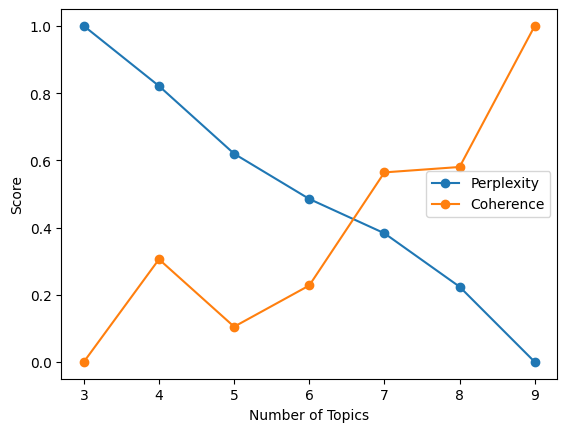

In [84]:
# Question 14: Visualize results of comparing the perplexity/coherence from the previous
# question.

# Visualize results
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize these scores to the same scale
scaler = MinMaxScaler()
df_fit[['perplexity', 'coherence']] = scaler.fit_transform(df_fit[['perplexity', 'coherence']])

plt.plot(df_fit.index, df_fit.perplexity, marker='o');
plt.plot(df_fit.index, df_fit.coherence, marker='o');
plt.legend(['Perplexity', 'Coherence'], loc='best')
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.show()

In [87]:
# Question 15: Build one more LDA model with 9 topics. Keep the other parameters the same as all prior LDA models. 
# Then, generate new features (one for each topic) and then generate a topic score for every document. 
# Add these new topic scores to the version of the DataFrame that includes the new features representing the counts 
# of parts of speech and named entities required earlier in this assignment.

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=9,
                                              random_state=1,
                                              chunksize=20,
                                              passes=10,
                                              per_word_topics=True)

df_topics = df_topics.copy()

num_topics = len(lda_model.get_topics()) # store the number of topics from the last model
for col in range(num_topics): # generate a new column for each topic
  df_topics[f'topic_{col + 1}'] = 0.0

# Store the topic score and dominant topic
for i, words in enumerate(docs):
  doc = lda_model[id2word.doc2bow(words)] # generate a corpus for this document set of words

  for j, score in enumerate(doc[0]): # for each document in the corpus
    # Get the topic score and store it in the appropriate column
    df_topics.iat[i, (len(df_topics.columns) - ((num_topics) - score[0]))] = score[1]

def clean_text(tokenized_doc):
    collection = [] # Create a list of fragments to keep
    for token in tokenized_doc:
        if not token.is_stop and token.pos_ != 'PUNCT':
            collection.append(token.lemma_) # Add the lemmatized version of the word
    return tuple(collection)

      # Make a function to count up a given part of speech
def count_pos(tokenized_doc, pos):
    count = 0
    for token in tokenized_doc:
        if token.pos_ == pos:
            count += 1
    return count

def count_entities(tokenized_doc, ne):
    count = 0
    for token in tokenized_doc.ents:
        if token.label_ == ne:
            count += 1
    return count

nlp = spacy.load("en_core_web_sm")
df_topics['Tokenized'] = df_topics['text'].apply(lambda x: clean_text(nlp(x)))
df_topics['Nouns'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'NOUN'))
df_topics['Verbs'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'VERB'))
df_topics['Adjectives'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'ADJ'))
df_topics['Numbers'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'NUM'))
df_topics['Pronouns'] = df_topics['text'].apply(lambda x: count_pos(nlp(x), 'PRON'))
df_topics['People'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'PERSON'))
df_topics['Organizations'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'ORG'))
df_topics['Locations'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'GPE'))
df_topics['Products'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'PRODUCT'))
df_topics['Events'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'EVENT'))
df_topics['Dates'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'DATE'))
df_topics['Times'] = df_topics['text'].apply(lambda x: count_entities(nlp(x), 'TIME'))

df_topics.head()

,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,...,Times,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,...,2,0.0,0.000000,0.000000,0.000000,0.756058,0.000000,0.065764,0.140953,0.0000
1,1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,...,0,0.0,0.000000,0.119020,0.064052,0.068604,0.000000,0.000000,0.721081,0.0000
2,1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,...,0,0.0,0.130941,0.045559,0.000000,0.000000,0.754821,0.000000,0.000000,0.0459
3,1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,...,0,0.0,0.000000,0.000000,0.072302,0.074312,0.162470,0.655464,0.000000,0.0000
4,1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,...,0,0.0,0.000000,0.000000,0.072302,0.074312,0.162466,0.655467,0.000000,0.0000


/var/folders/n0/fpj669xs7mdf7dy6vwdnptk40000gn/T/ipykernel_94114/2824718034.py:44: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.tight_layout(w_pad=2)
/var/folders/n0/fpj669xs7mdf7dy6vwdnptk40000gn/T/ipykernel_94114/2824718034.py:44: UserWarning: Glyph 129308 (\N{RIGHT-FACING FIST}) missing from current font.
  fig.tight_layout(w_pad=2)
/var/folders/n0/fpj669xs7mdf7dy6vwdnptk40000gn/T/ipykernel_94114/2824718034.py:44: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.tight_layout(w_pad=2)
/var/folders/n0/fpj669xs7mdf7dy6vwdnptk40000gn/T/ipykernel_94114/2824718034.py:44: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from current font.
  fig.tight_layout(w_pad=2)
/var/folders/n0/fpj669xs7mdf7dy6vwdnptk40000gn/T/ipykernel_94114/2824718034.py:44: UserWarning: Glyph 129440 (\N{MICROBE}) missing from current font.
  fig.tight_layout(w_pad=2)
/Users/graceogden/Documents/BYU/2024Winter/IS455/ClassCode455/myenv/lib/pyt

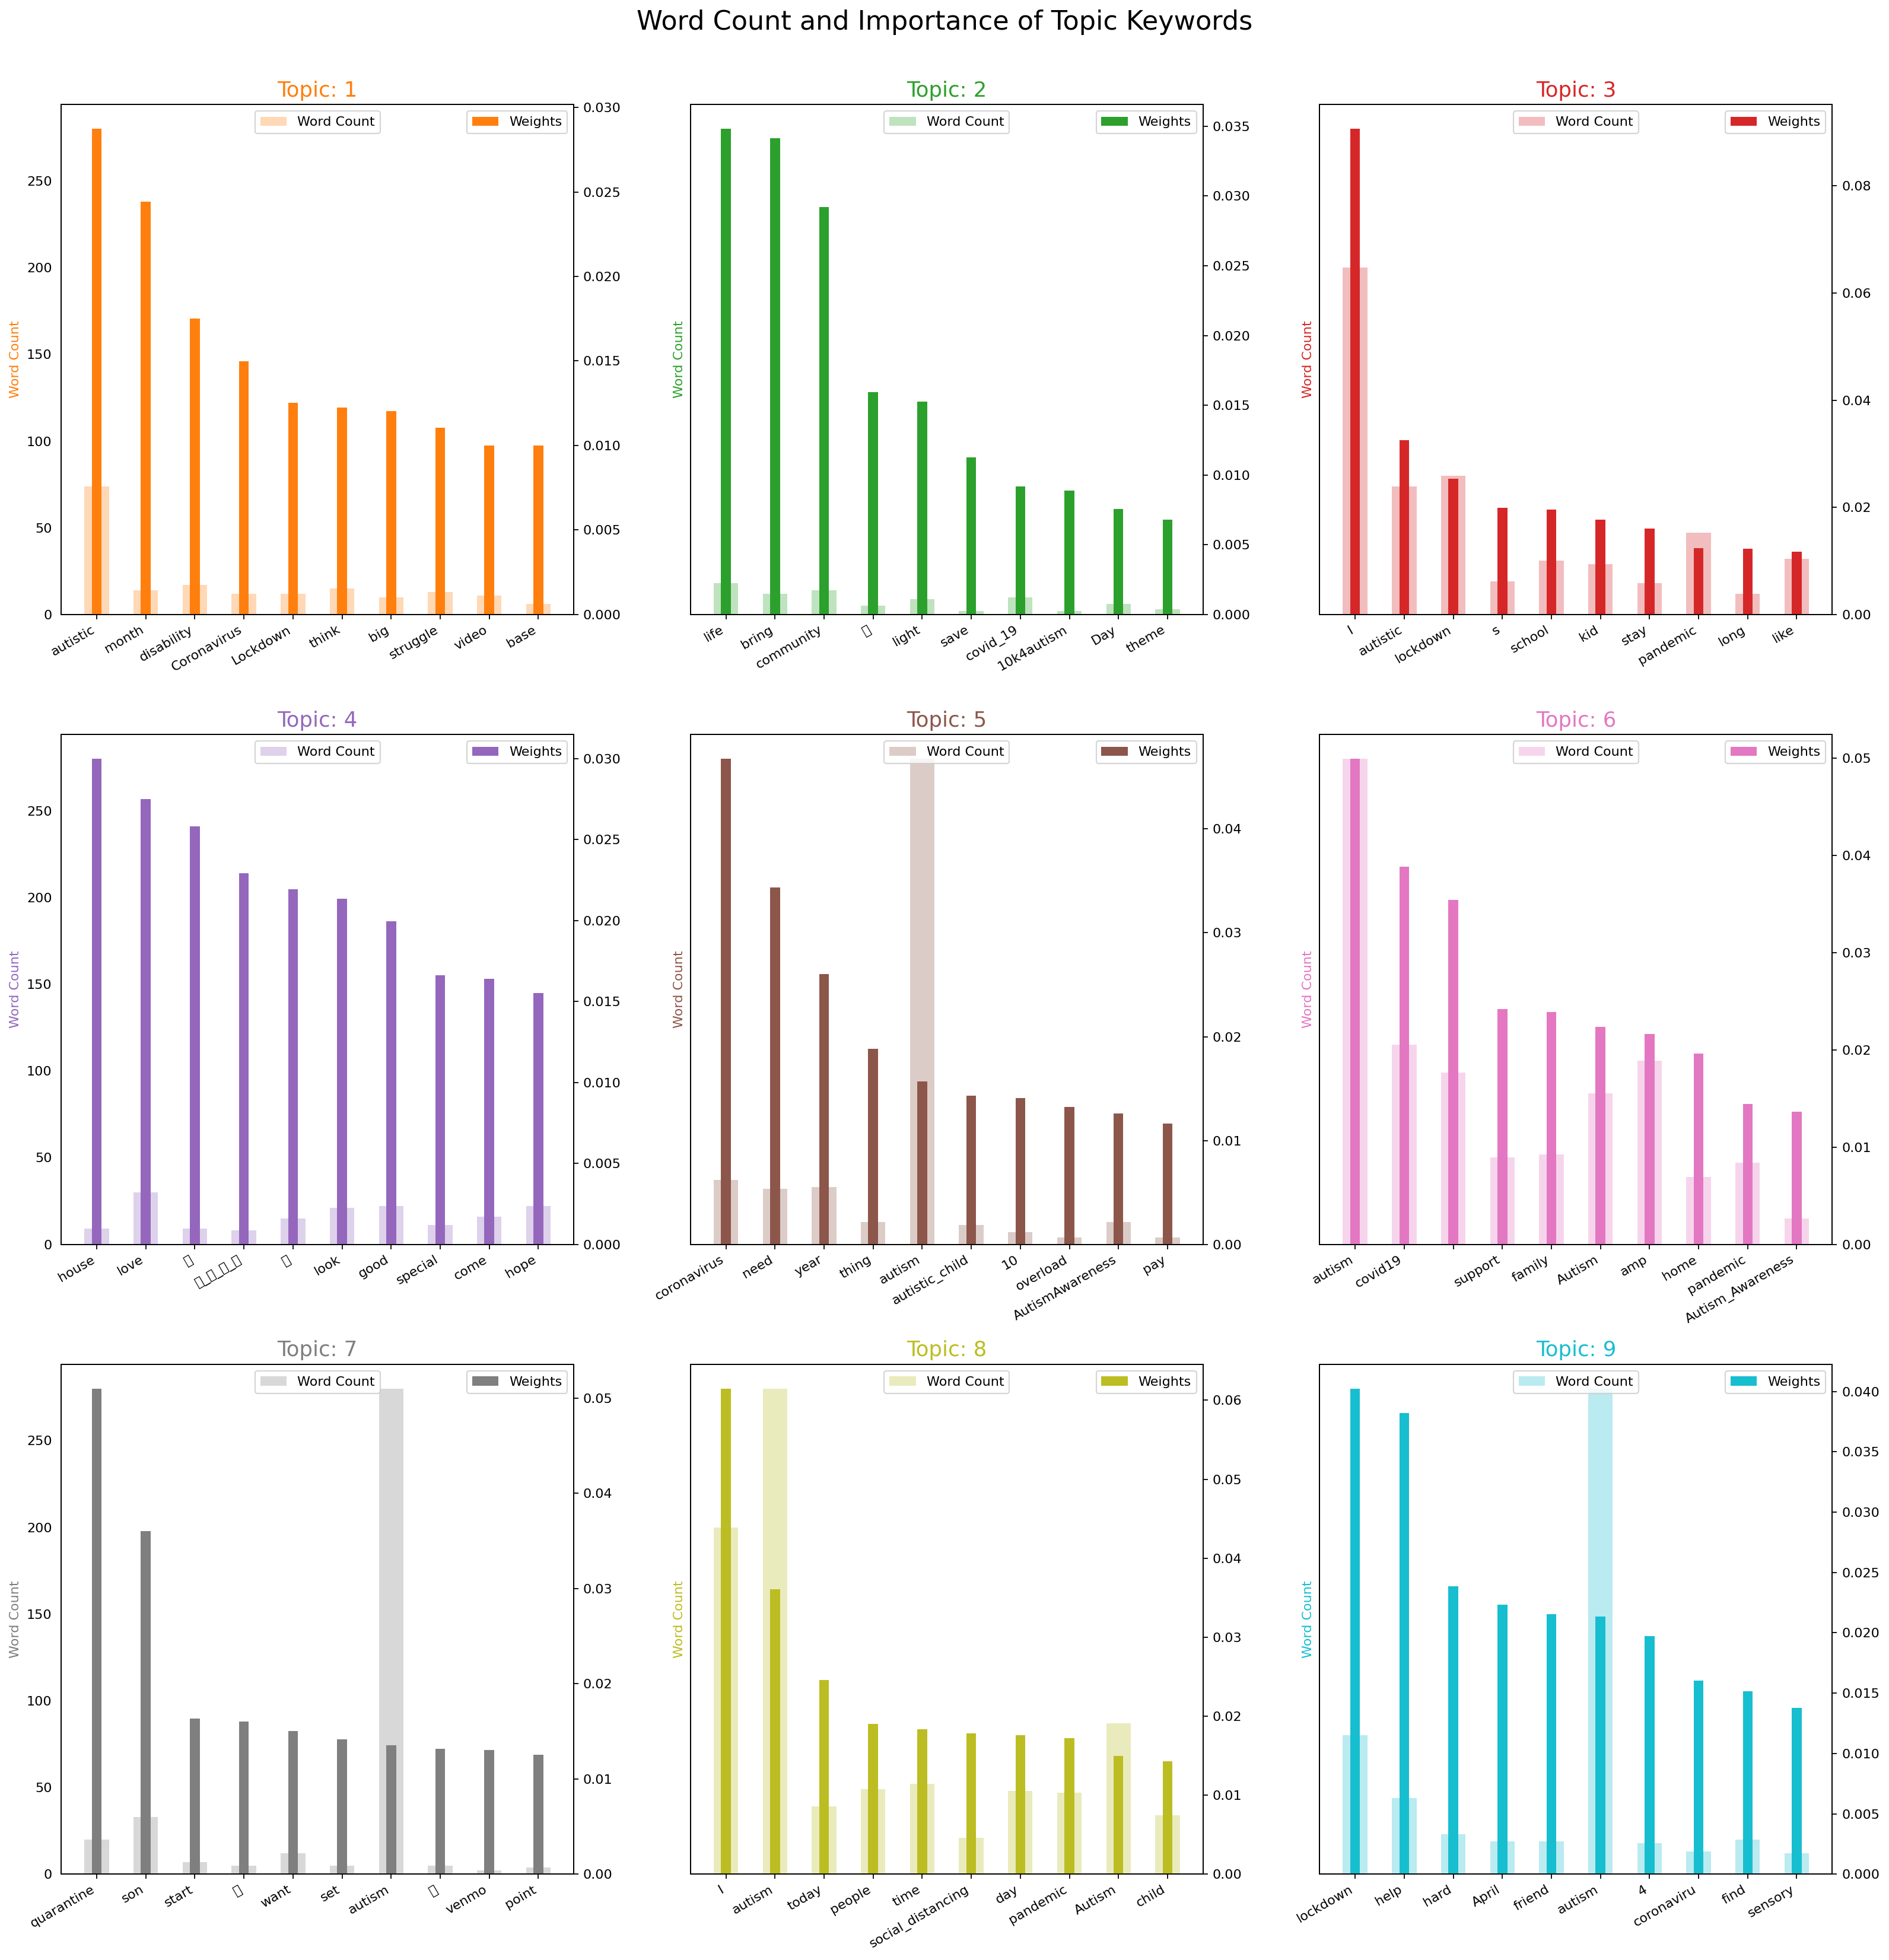

In [88]:
# Question 16:
# Create a bar chart of word counts for all topics. Plot Word Count and Weights
# of Topic Keywords as demonstrated in the chapter.


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors, math

# Bar chart of word counts for each topic
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
  for word, weight in topic:
    out.append([word, i + 1, weight, counter[word]])

df_temp = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
matrix_size = math.ceil(num_topics**(1/2))  # Computes the n by n number of plots to generate
fig, axes = plt.subplots(matrix_size, matrix_size, figsize=(20,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
  ax.bar(x='word', height="word_count", data=df_temp.loc[df_temp.topic_id==i+1, :], color=cols[i+1], width=0.5, alpha=0.3, label='Word Count')
  ax_twin = ax.twinx()
  ax_twin.bar(x='word', height="importance", data=df_temp.loc[df_temp.topic_id==i+1, :], color=cols[i+1], width=0.2, label='Weights')
  ax.set_ylabel('Word Count', color=cols[i+1])
  ax.set_title('Topic: ' + str(i + 1), color=cols[i+1], fontsize=16)
  ax.tick_params(axis='y', left=False)
  ax.set_xticks(ax.get_xticks())
  ax.set_xticklabels(df_temp.loc[df_temp.topic_id==i+1, 'word'], rotation=30, horizontalalignment= 'right')
  ax.legend(loc='upper center'); ax_twin.legend(loc='upper right')
  if i >= len(topics): # Turn off the unneeded subplots
    ax.axis('off')
    ax.title.set_visible(False)
    ax_twin.axis('off')
    ax.legend().set_visible(False)
    ax_twin.legend().set_visible(False)

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=20, y=1.03)
plt.show()

In [81]:
# Question 17:
# Visualize the number of documents/tweets attributed to each topic is through
# a t-distributed Stochastic Neighbor Embedding (SNE) chart.



In [82]:
# Question 18:
# Print out an interactive visualization with pyLDAvis.

